In [63]:
# Import all required packages

import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')
from numpy  import nan

In [107]:
def outlier_normal(data_frame,feature_name):
    low_bou = data_frame[feature_name].mean()-3*data_frame[feature_name].std()
    up_bou = data_frame[feature_name].mean()+3*data_frame[feature_name].std()
    return(low_bou,up_bou)

In [64]:
df = pd.read_csv("car_data.csv")

In [65]:
df.head()

,Model,Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Location
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Delhi
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,Coimbatore
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,Mumbai
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Hyderabad
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,Mumbai


In [66]:
df.dtypes

Model                object
Price                 int64
Kilometers Driven     int64
Year                  int64
Owner                object
Fuel Type            object
Transmission         object
Location             object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              4363 non-null   object
 1   Price              4363 non-null   int64 
 2   Kilometers Driven  4363 non-null   int64 
 3   Year               4363 non-null   int64 
 4   Owner              4363 non-null   object
 5   Fuel Type          4363 non-null   object
 6   Transmission       4363 non-null   object
 7   Location           4363 non-null   object
dtypes: int64(3), object(5)
memory usage: 272.8+ KB


In [68]:
df.columns

Index(['Model', 'Price', 'Kilometers Driven', 'Year', 'Owner', 'Fuel Type',
       'Transmission', 'Location'],
      dtype='object')

In [69]:
df.isnull().sum()

Model                0
Price                0
Kilometers Driven    0
Year                 0
Owner                0
Fuel Type            0
Transmission         0
Location             0
dtype: int64

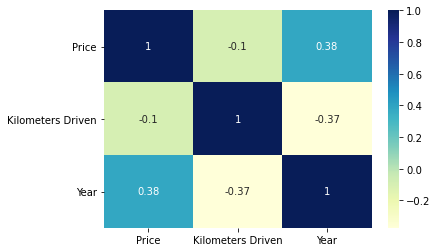

In [70]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [71]:
df['Model'].value_counts()

MarutiSwift                                             161
MarutiAltoK10                                           118
MarutiWagonR1.0                                         105
MarutiAlto800                                            91
MarutiSwiftDzireVDIBS                                    76
                                                       ... 
MahindraMARAZZOM87                                        1
Audi A4 35 TDI Technology                                 1
BMW X1 xDrive 20d xLine                                   1
Ford Endeavour 3.0L AT 4x2                                1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde      1
Name: Model, Length: 1202, dtype: int64

In [72]:
df['Owner'].value_counts()

First Owner     3382
Second Owner     844
Third Owner      131
Fourth Owner       6
Name: Owner, dtype: int64

<AxesSubplot:>

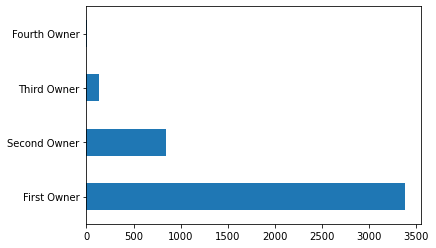

In [73]:
df['Owner'].value_counts().plot(kind='barh')

In [74]:
df['Fuel Type'].value_counts()

Petrol          2612
Diesel          1559
Petrol + CNG     174
Petrol + LPG      10
CNG                6
LPG                2
Name: Fuel Type, dtype: int64

<AxesSubplot:>

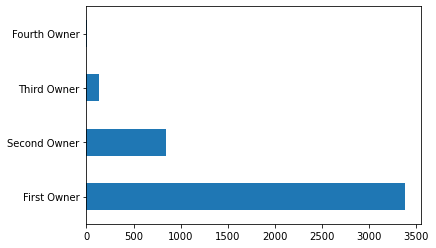

In [75]:
df['Owner'].value_counts().plot(kind='barh')

In [76]:
df['Transmission'].value_counts()

MANUAL       3432
AUTOMATIC     931
Name: Transmission, dtype: int64

<AxesSubplot:>

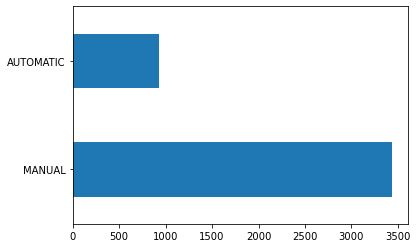

In [77]:
df['Transmission'].value_counts().plot(kind='barh')

<AxesSubplot:>

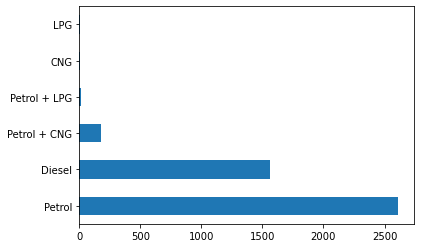

In [78]:
df['Fuel Type'].value_counts().plot(kind='barh')

In [79]:
df['Location'].value_counts()

Pune          790
Mumbai        777
Coimbatore    408
Hyderabad     402
Kochi         363
Kolkata       357
Delhi         318
Chennai       291
Jaipur        258
Bangalore     246
Ahmedabad     153
Name: Location, dtype: int64

<AxesSubplot:>

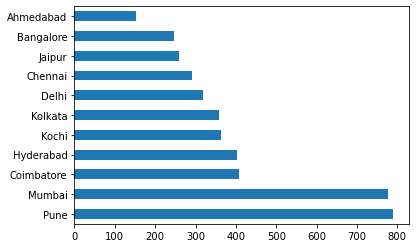

In [80]:
df['Location'].value_counts().plot(kind='barh')

array([[<AxesSubplot:title={'center':'Kilometers Driven'}>]], dtype=object)

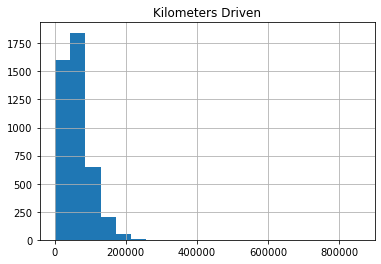

In [81]:
df.hist(column='Kilometers Driven', bins=20)

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

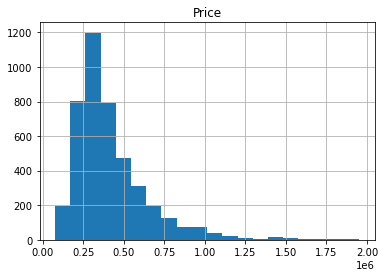

In [82]:
df.hist(column='Price', bins=20)

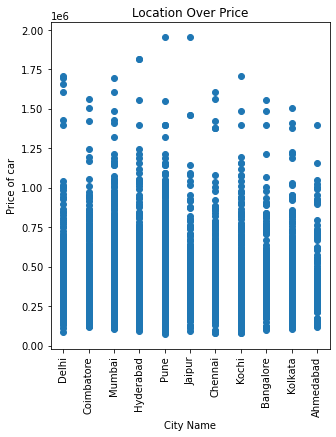

In [83]:
plt.figure(figsize = (5, 6))
plt.title('Location Over Price')
plt.scatter(df['Location'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('City Name')
plt.ylabel('Price of car')
plt.show()

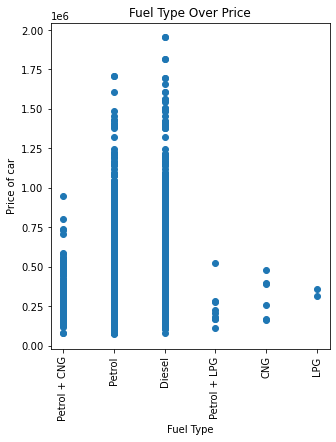

In [84]:
plt.figure(figsize = (5, 6))
plt.title('Fuel Type Over Price')
plt.scatter(df['Fuel Type'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Fuel Type')
plt.ylabel('Price of car')
plt.show()

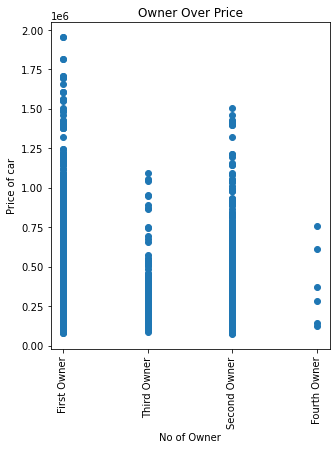

In [85]:
plt.figure(figsize = (5, 6))
plt.title('Owner Over Price')
plt.scatter(df['Owner'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('No of Owner')
plt.ylabel('Price of car')
plt.show()

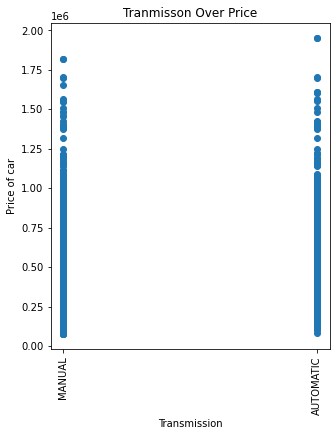

In [86]:
plt.figure(figsize = (5, 6))
plt.title('Tranmisson Over Price')
plt.scatter(df['Transmission'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Transmission')
plt.ylabel('Price of car')
plt.show()

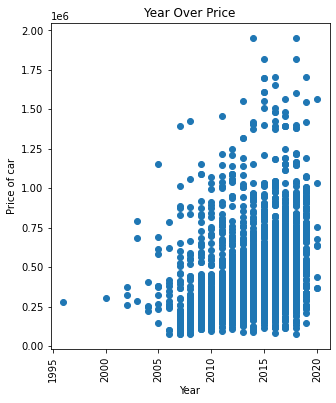

In [87]:
plt.figure(figsize = (5, 6))
plt.title('Year Over Price')
plt.scatter(df['Year'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Price of car')
plt.show()

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

<AxesSubplot:>

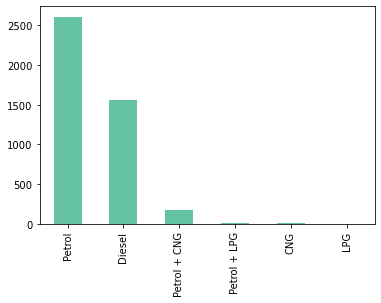

In [89]:
df['Fuel Type'].value_counts().plot.bar(cmap='Set2')

<AxesSubplot:>

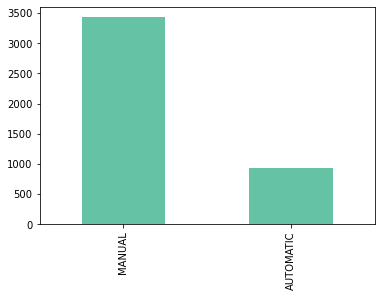

In [90]:
df['Transmission'].value_counts().plot.bar(cmap='Set2')

<AxesSubplot:>

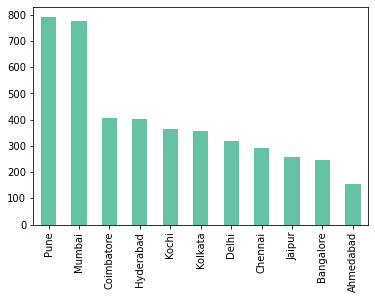

In [91]:
df['Location'].value_counts().plot.bar(cmap='Set2')

<AxesSubplot:>

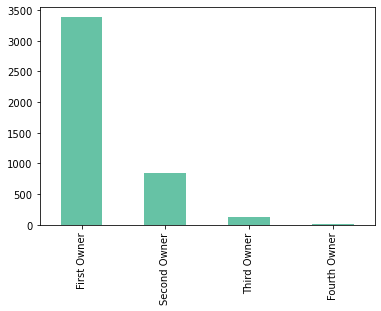

In [92]:
df['Owner'].value_counts().plot.bar(cmap='Set2')

<AxesSubplot:>

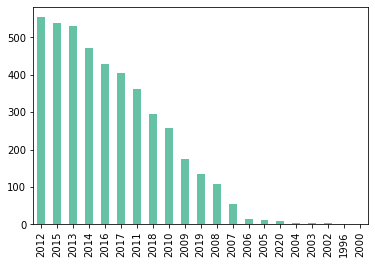

In [93]:
df['Year'].value_counts().plot.bar(cmap='Set2')

In [94]:
df.drop(["Model"],axis =1 , inplace=True)

In [95]:
#One Hot Coding:
df=pd.get_dummies(df,columns=['Location','Fuel Type','Transmission','Owner'])

In [96]:
df.head()

,Price,Kilometers Driven,Year,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_AUTOMATIC,Transmission_MANUAL,Owner_First Owner,Owner_Fourth Owner,Owner_Second Owner,Owner_Third Owner
0,312165,82238,2014,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
1,313799,30558,2013,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,295999,22164,2018,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,435199,30535,2013,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,289099,15738,2013,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [97]:
df.isnull().sum()

Price                     0
Kilometers Driven         0
Year                      0
Location_Ahmedabad        0
Location_Bangalore        0
Location_Chennai          0
Location_Coimbatore       0
Location_Delhi            0
Location_Hyderabad        0
Location_Jaipur           0
Location_Kochi            0
Location_Kolkata          0
Location_Mumbai           0
Location_Pune             0
Fuel Type_CNG             0
Fuel Type_Diesel          0
Fuel Type_LPG             0
Fuel Type_Petrol          0
Fuel Type_Petrol + CNG    0
Fuel Type_Petrol + LPG    0
Transmission_AUTOMATIC    0
Transmission_MANUAL       0
Owner_First Owner         0
Owner_Fourth Owner        0
Owner_Second Owner        0
Owner_Third Owner         0
dtype: int64

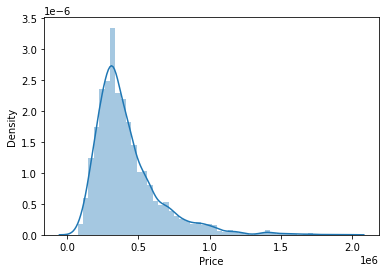

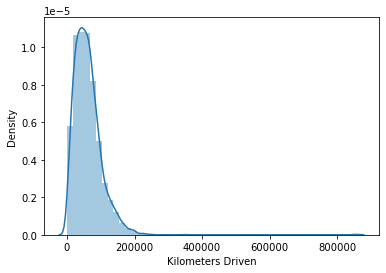

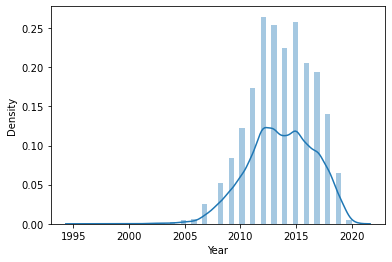

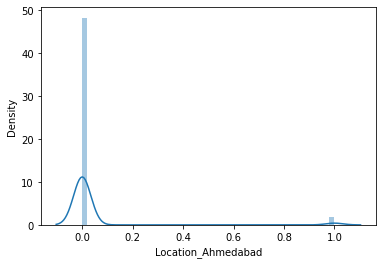

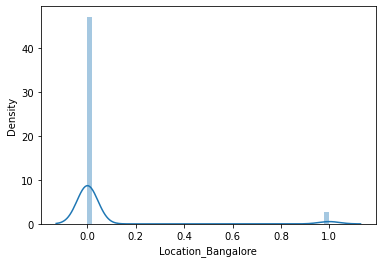

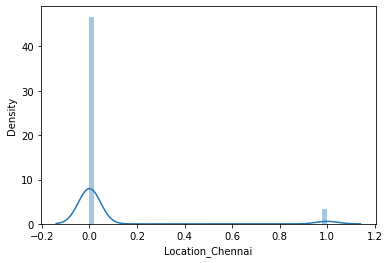

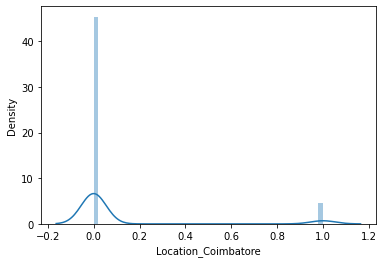

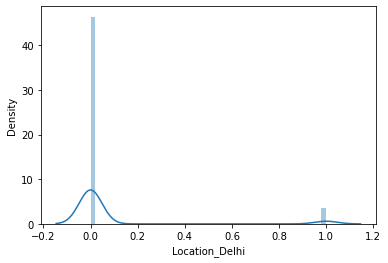

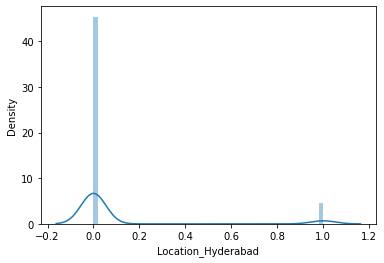

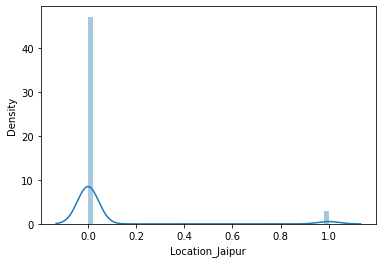

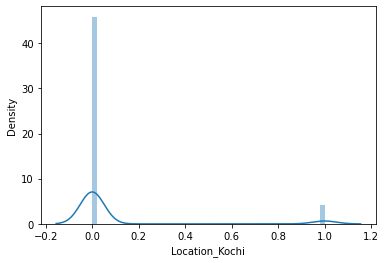

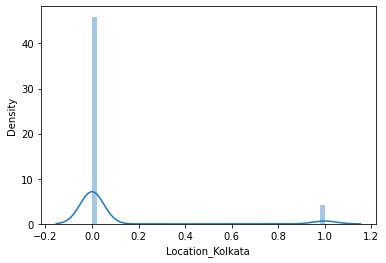

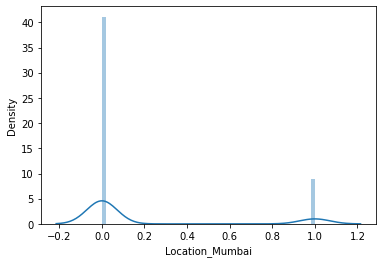

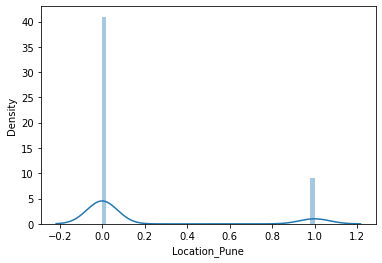

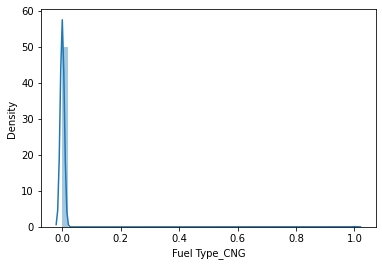

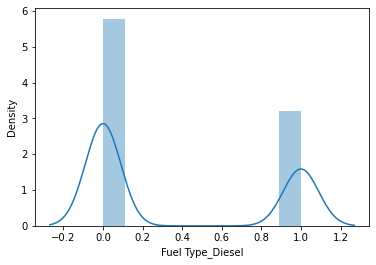

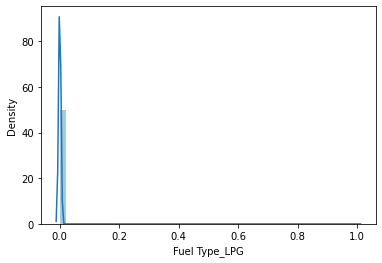

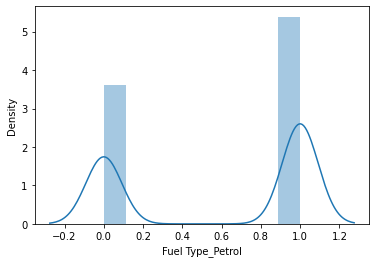

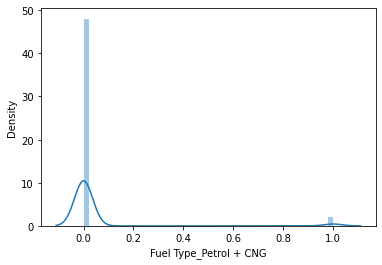

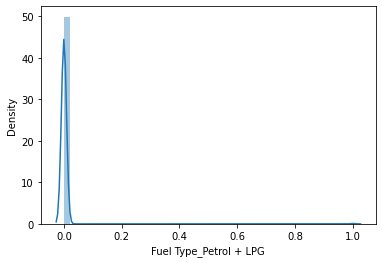

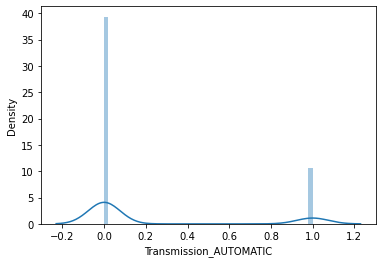

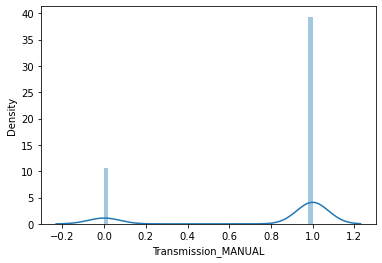

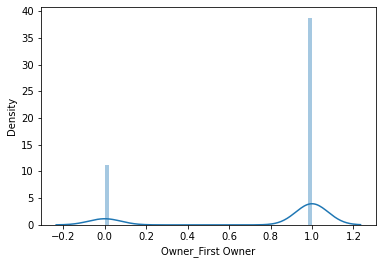

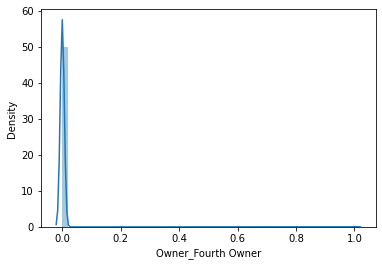

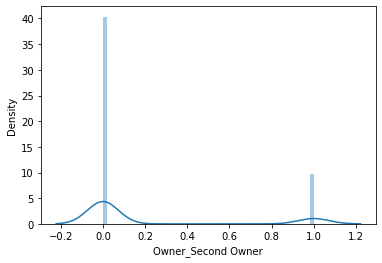

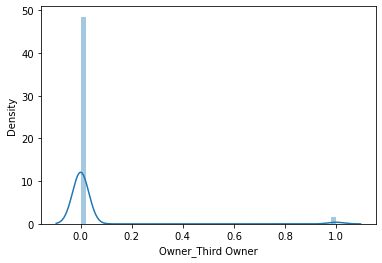

In [98]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

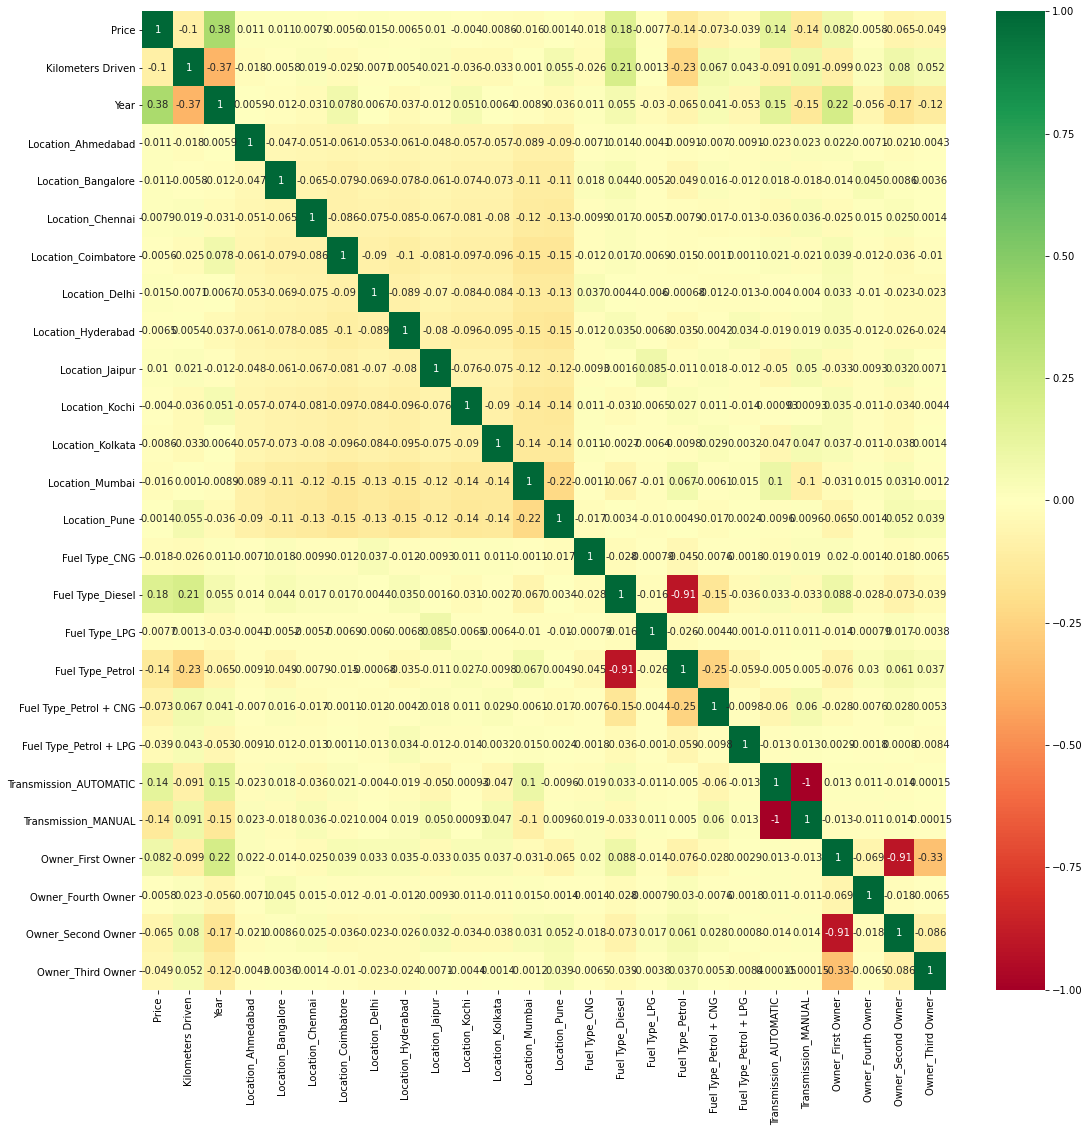

In [99]:
plt.figure(figsize = (18,18))
sb.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

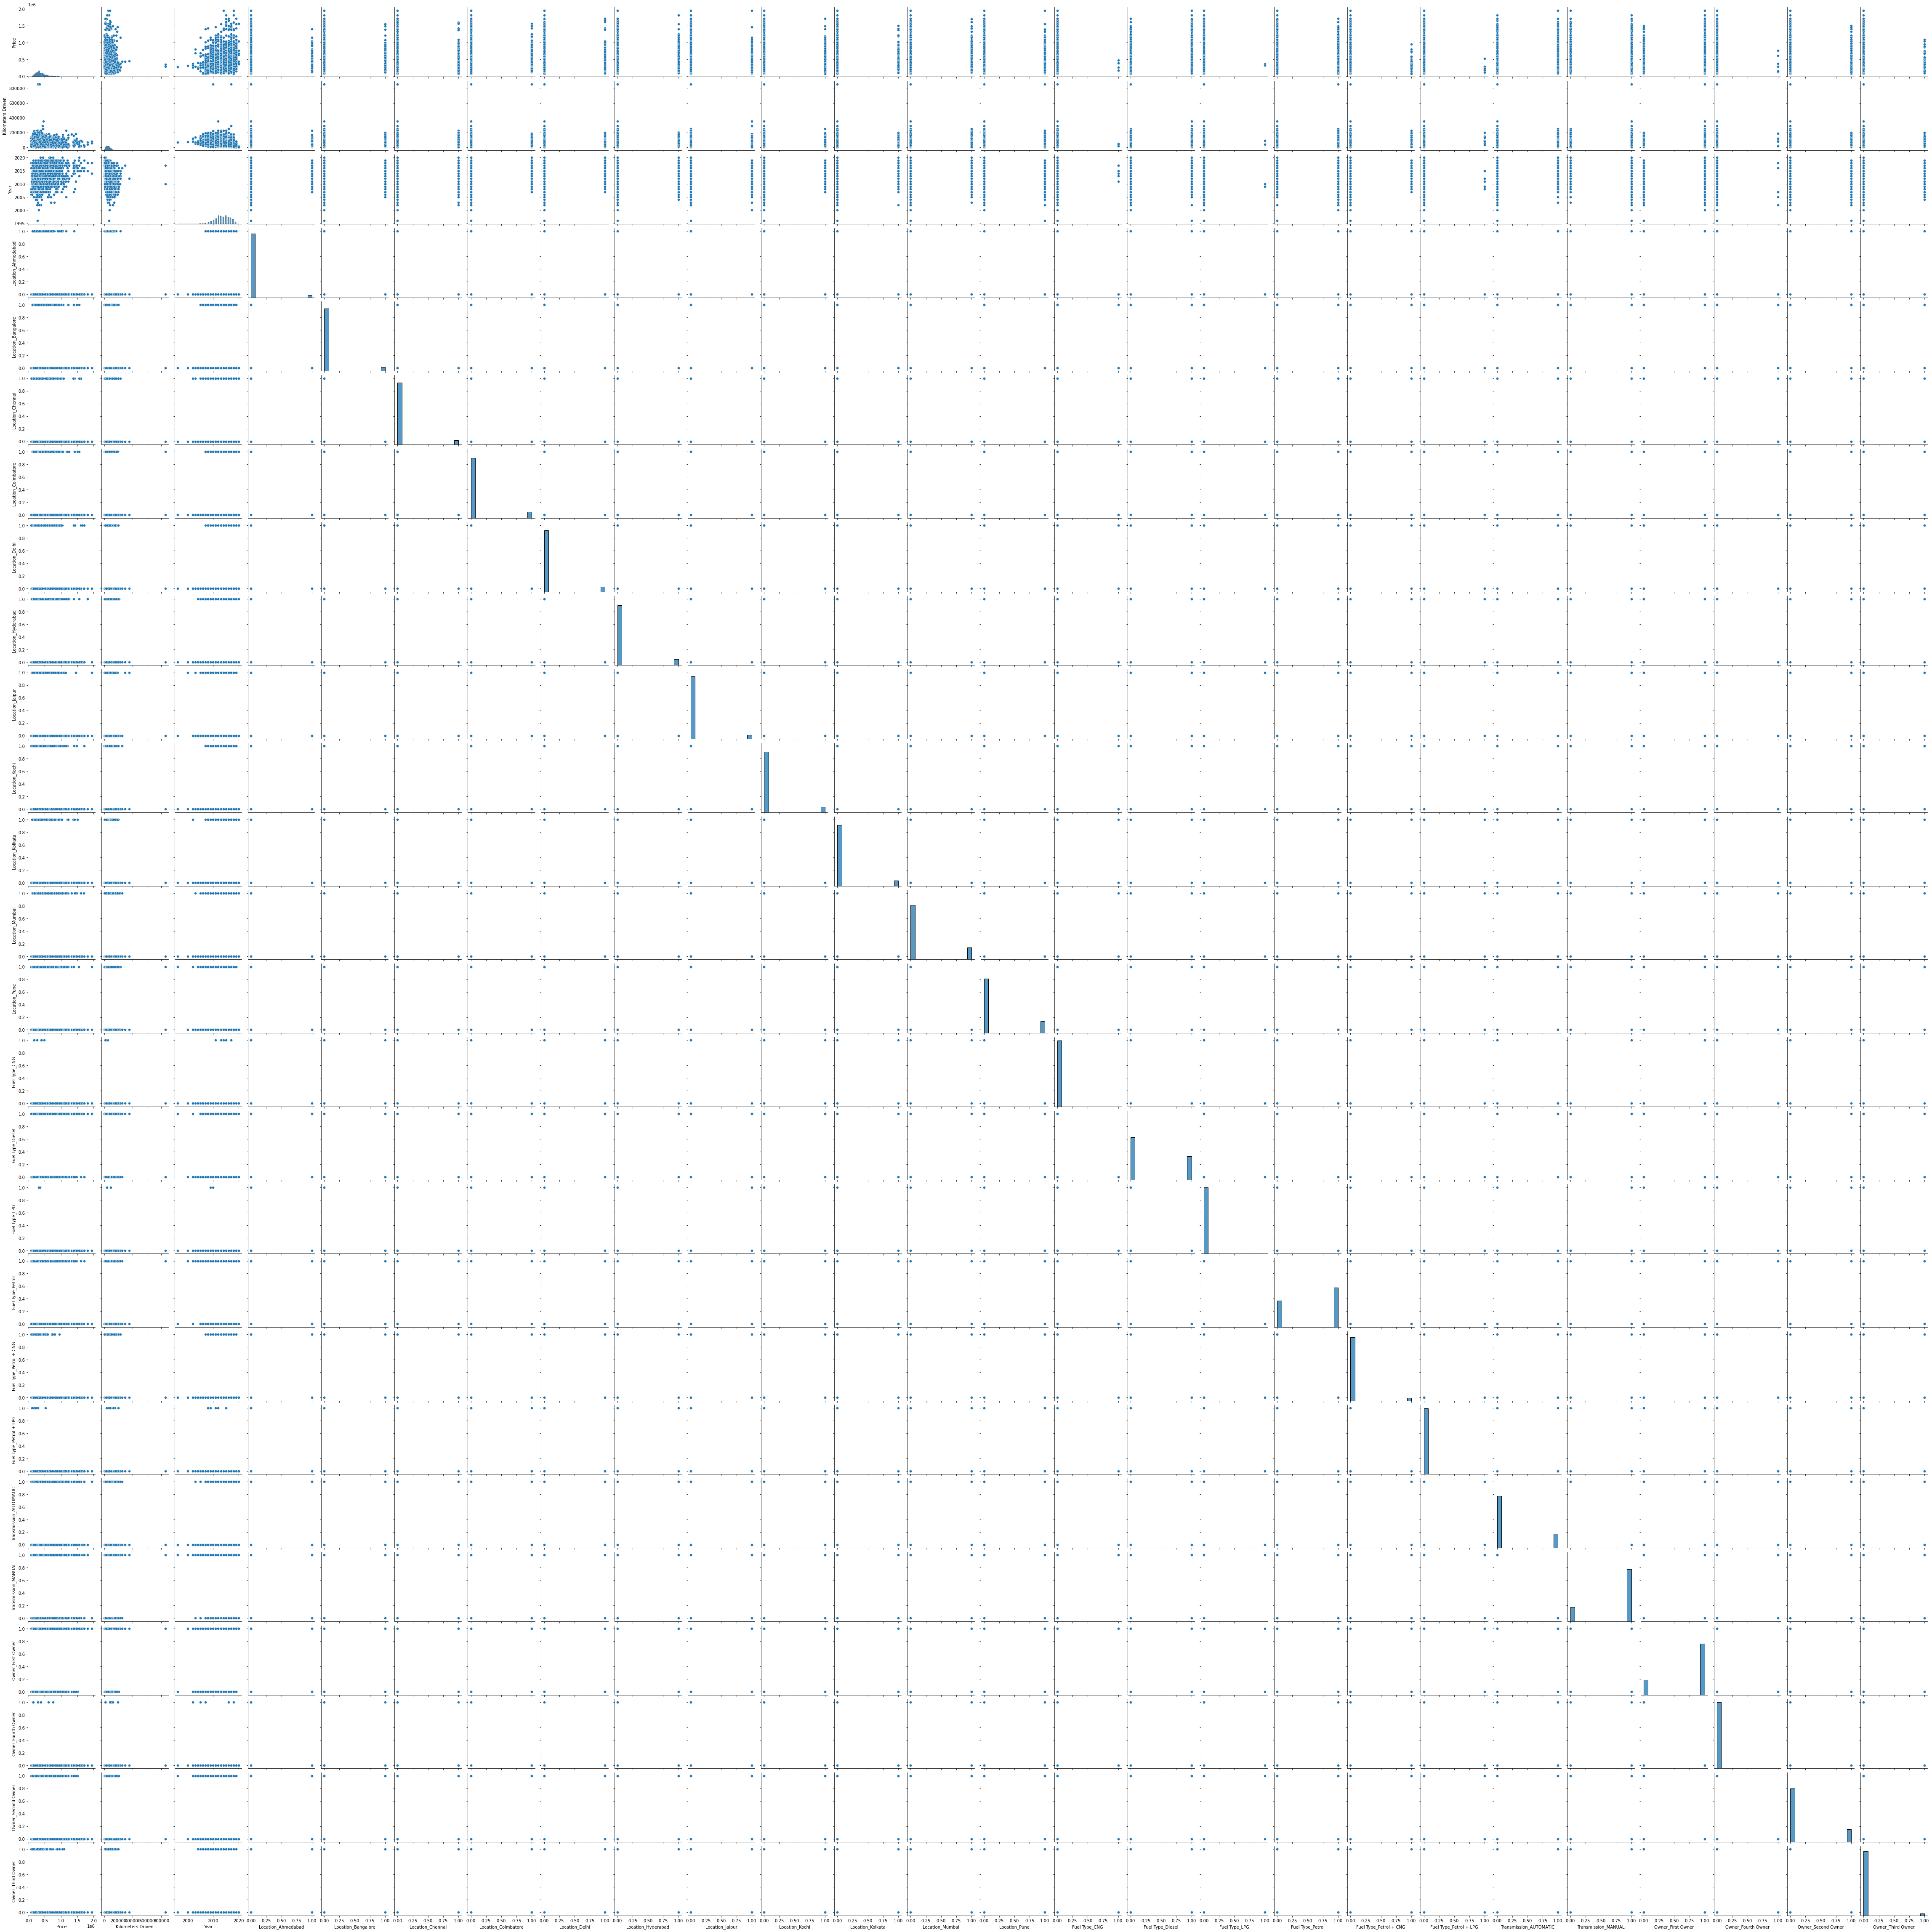

In [100]:
sb.pairplot(df)

In [101]:
df.shape

(4363, 26)

In [102]:
x = df.drop(['Price'], axis=1)

In [103]:
y = df['Price']

In [104]:
#Checking skewness 
x.skew()

Kilometers Driven          4.015825
Year                      -0.351016
Location_Ahmedabad         5.056705
Location_Bangalore         3.847818
Location_Chennai           3.474607
Location_Coimbatore        2.793233
Location_Delhi             3.287274
Location_Hyderabad         2.821382
Location_Jaipur            3.739427
Location_Kochi             3.019321
Location_Kolkata           3.052345
Location_Mumbai            1.683393
Location_Pune              1.657038
Fuel Type_CNG             26.919626
Fuel Type_Diesel           0.595671
Fuel Type_LPG             46.690463
Fuel Type_Petrol          -0.402738
Fuel Type_Petrol + CNG     4.704409
Fuel Type_Petrol + LPG    20.823074
Transmission_AUTOMATIC     1.399634
Transmission_MANUAL       -1.399634
Owner_First Owner         -1.318622
Owner_Fourth Owner        26.919626
Owner_Second Owner         1.552717
Owner_Third Owner          5.509734
dtype: float64

In [110]:
outlier_normal (df,"Kilometers Driven")

(-63875.683632234766, 186488.86813830858)

In [111]:
df.loc[df["Kilometers Driven"]>=186488.86,"Kilometers Driven"]= 186488.86

In [112]:
df[df["Kilometers Driven"]>=186488.86]

,Price,Kilometers Driven,Year,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_AUTOMATIC,Transmission_MANUAL,Owner_First Owner,Owner_Fourth Owner,Owner_Second Owner,Owner_Third Owner
59,282699,186488.86,2010,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
274,125199,186488.86,2007,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
364,171699,186488.86,2010,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
400,248599,186488.86,2013,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
431,436399,186488.86,2016,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
590,228599,186488.86,2009,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
653,333399,186488.86,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
660,210834,186488.86,2008,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
816,305999,186488.86,2012,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
995,294699,186488.86,2013,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [113]:
df.shape

(4363, 26)

In [116]:
x.head()

,Kilometers Driven,Year,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_AUTOMATIC,Transmission_MANUAL,Owner_First Owner,Owner_Fourth Owner,Owner_Second Owner,Owner_Third Owner
0,82238,2014,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,30558,2013,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,22164,2018,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,30535,2013,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,15738,2013,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [117]:
y.head()

0    312165
1    313799
2    295999
3    435199
4    289099
Name: Price, dtype: int64

In [118]:
x = df.drop(['Year'], axis=1)

In [119]:
x.head()

,Price,Kilometers Driven,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_AUTOMATIC,Transmission_MANUAL,Owner_First Owner,Owner_Fourth Owner,Owner_Second Owner,Owner_Third Owner
0,312165,82238.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,313799,30558.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,295999,22164.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,435199,30535.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,289099,15738.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
lr = LinearRegression()
from sklearn.metrics import r2_score

In [120]:
# checking best model
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At Random State",i,"the traning accuracy is :-", r2_score(y_train,pred_train))
    print("\n")

At Random State 0 the traning accuracy is :- 1.0


At Random State 1 the traning accuracy is :- 1.0


At Random State 2 the traning accuracy is :- 1.0


At Random State 3 the traning accuracy is :- 1.0


At Random State 4 the traning accuracy is :- 1.0


At Random State 5 the traning accuracy is :- 1.0


At Random State 6 the traning accuracy is :- 1.0


At Random State 7 the traning accuracy is :- 1.0


At Random State 8 the traning accuracy is :- 1.0


At Random State 9 the traning accuracy is :- 1.0


At Random State 10 the traning accuracy is :- 1.0


At Random State 11 the traning accuracy is :- 1.0


At Random State 12 the traning accuracy is :- 1.0


At Random State 13 the traning accuracy is :- 1.0


At Random State 14 the traning accuracy is :- 1.0


At Random State 15 the traning accuracy is :- 1.0


At Random State 16 the traning accuracy is :- 1.0


At Random State 17 the traning accuracy is :- 1.0


At Random State 18 the traning accuracy is :- 1.0


At Random State 19 the

At Random State 167 the traning accuracy is :- 1.0


At Random State 168 the traning accuracy is :- 1.0


At Random State 169 the traning accuracy is :- 1.0


At Random State 170 the traning accuracy is :- 1.0


At Random State 171 the traning accuracy is :- 1.0


At Random State 172 the traning accuracy is :- 1.0


At Random State 173 the traning accuracy is :- 1.0


At Random State 174 the traning accuracy is :- 1.0


At Random State 175 the traning accuracy is :- 1.0


At Random State 176 the traning accuracy is :- 1.0


At Random State 177 the traning accuracy is :- 1.0


At Random State 178 the traning accuracy is :- 1.0


At Random State 179 the traning accuracy is :- 1.0


At Random State 180 the traning accuracy is :- 1.0


At Random State 181 the traning accuracy is :- 1.0


At Random State 182 the traning accuracy is :- 1.0


At Random State 183 the traning accuracy is :- 1.0


At Random State 184 the traning accuracy is :- 1.0


At Random State 185 the traning accuracy is :-

At Random State 325 the traning accuracy is :- 1.0


At Random State 326 the traning accuracy is :- 1.0


At Random State 327 the traning accuracy is :- 1.0


At Random State 328 the traning accuracy is :- 1.0


At Random State 329 the traning accuracy is :- 1.0


At Random State 330 the traning accuracy is :- 1.0


At Random State 331 the traning accuracy is :- 1.0


At Random State 332 the traning accuracy is :- 1.0


At Random State 333 the traning accuracy is :- 1.0


At Random State 334 the traning accuracy is :- 1.0


At Random State 335 the traning accuracy is :- 1.0


At Random State 336 the traning accuracy is :- 1.0


At Random State 337 the traning accuracy is :- 1.0


At Random State 338 the traning accuracy is :- 1.0


At Random State 339 the traning accuracy is :- 1.0


At Random State 340 the traning accuracy is :- 1.0


At Random State 341 the traning accuracy is :- 1.0


At Random State 342 the traning accuracy is :- 1.0


At Random State 343 the traning accuracy is :-

At Random State 481 the traning accuracy is :- 1.0


At Random State 482 the traning accuracy is :- 1.0


At Random State 483 the traning accuracy is :- 1.0


At Random State 484 the traning accuracy is :- 1.0


At Random State 485 the traning accuracy is :- 1.0


At Random State 486 the traning accuracy is :- 1.0


At Random State 487 the traning accuracy is :- 1.0


At Random State 488 the traning accuracy is :- 1.0


At Random State 489 the traning accuracy is :- 1.0


At Random State 490 the traning accuracy is :- 1.0


At Random State 491 the traning accuracy is :- 1.0


At Random State 492 the traning accuracy is :- 1.0


At Random State 493 the traning accuracy is :- 1.0


At Random State 494 the traning accuracy is :- 1.0


At Random State 495 the traning accuracy is :- 1.0


At Random State 496 the traning accuracy is :- 1.0


At Random State 497 the traning accuracy is :- 1.0


At Random State 498 the traning accuracy is :- 1.0


At Random State 499 the traning accuracy is :-

At Random State 636 the traning accuracy is :- 1.0


At Random State 637 the traning accuracy is :- 1.0


At Random State 638 the traning accuracy is :- 1.0


At Random State 639 the traning accuracy is :- 1.0


At Random State 640 the traning accuracy is :- 1.0


At Random State 641 the traning accuracy is :- 1.0


At Random State 642 the traning accuracy is :- 1.0


At Random State 643 the traning accuracy is :- 1.0


At Random State 644 the traning accuracy is :- 1.0


At Random State 645 the traning accuracy is :- 1.0


At Random State 646 the traning accuracy is :- 1.0


At Random State 647 the traning accuracy is :- 1.0


At Random State 648 the traning accuracy is :- 1.0


At Random State 649 the traning accuracy is :- 1.0


At Random State 650 the traning accuracy is :- 1.0


At Random State 651 the traning accuracy is :- 1.0


At Random State 652 the traning accuracy is :- 1.0


At Random State 653 the traning accuracy is :- 1.0


At Random State 654 the traning accuracy is :-

At Random State 792 the traning accuracy is :- 1.0


At Random State 793 the traning accuracy is :- 1.0


At Random State 794 the traning accuracy is :- 1.0


At Random State 795 the traning accuracy is :- 1.0


At Random State 796 the traning accuracy is :- 1.0


At Random State 797 the traning accuracy is :- 1.0


At Random State 798 the traning accuracy is :- 1.0


At Random State 799 the traning accuracy is :- 1.0


At Random State 800 the traning accuracy is :- 1.0


At Random State 801 the traning accuracy is :- 1.0


At Random State 802 the traning accuracy is :- 1.0


At Random State 803 the traning accuracy is :- 1.0


At Random State 804 the traning accuracy is :- 1.0


At Random State 805 the traning accuracy is :- 1.0


At Random State 806 the traning accuracy is :- 1.0


At Random State 807 the traning accuracy is :- 1.0


At Random State 808 the traning accuracy is :- 1.0


At Random State 809 the traning accuracy is :- 1.0


At Random State 810 the traning accuracy is :-

At Random State 952 the traning accuracy is :- 1.0


At Random State 953 the traning accuracy is :- 1.0


At Random State 954 the traning accuracy is :- 1.0


At Random State 955 the traning accuracy is :- 1.0


At Random State 956 the traning accuracy is :- 1.0


At Random State 957 the traning accuracy is :- 1.0


At Random State 958 the traning accuracy is :- 1.0


At Random State 959 the traning accuracy is :- 1.0


At Random State 960 the traning accuracy is :- 1.0


At Random State 961 the traning accuracy is :- 1.0


At Random State 962 the traning accuracy is :- 1.0


At Random State 963 the traning accuracy is :- 1.0


At Random State 964 the traning accuracy is :- 1.0


At Random State 965 the traning accuracy is :- 1.0


At Random State 966 the traning accuracy is :- 1.0


At Random State 967 the traning accuracy is :- 1.0


At Random State 968 the traning accuracy is :- 1.0


At Random State 969 the traning accuracy is :- 1.0


At Random State 970 the traning accuracy is :-

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [122]:
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
pred_test = lr.predict(x_test)

In [124]:
print(r2_score(y_test,pred_test))

1.0


In [125]:
Train_accu = r2_score(y_train,pred_train)
Test_accu = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print("At score:",j,"the cv score:",cv_mean,"and accu for train",Train_accu,"and accu for test",Test_accu)
    print("\n")

At score: 2 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 3 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 4 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 5 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 6 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 7 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 8 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0


At score: 9 the cv score: 1.0 and accu for train -1.0958793063689805 and accu for test 1.0




In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

dts = r2_score(y_test,preddt)
print("dt score",dts*100)

dts_score = cross_val_score(dt,x,y,cv = 3)
dtc_score = dts_score.mean()
print("cross val score",dtc_score*100)

dt score 99.92616490857027
cross val score 99.89763981581544


In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

In [129]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf = rf.predict(x_test)

rfs = r2_score(y_test,predrf)
print('R2 Score',rfs*100)

R2 Score 99.80167417203899


In [130]:
rfs_score = cross_val_score(rf,x,y,cv = 3)
rfc_score = rfs_score.mean()
print("cross val score",rfc_score*100)

cross val score 99.97677319556163
